In [1]:
import sys
sys.path.append('..')

import glob
import os
from functools import partial
from IPython.display import HTML

import numpy as np

from keras.layers import Lambda
from keras.models import clone_model

from src import HMM, HMM_helper, preprocessing, utils, rhyme

Using TensorFlow backend.
[nltk_data] Downloading package cmudict to
[nltk_data]     /Users/muhammad/nltk_data...
[nltk_data]   Package cmudict is already up-to-date!


In [2]:
# try some stuff out for preprocessing
sonnets = utils.load_shakespeare()


all_rhymes = rhyme.get_individual_rhymes(sonnets)

obs_map, converted = preprocessing.create_sequences_sonnets(sonnets)

Some weird sonnet appeared with length 15!
Some weird sonnet appeared with length 12!


In [3]:
# now that the sequences are processed, we can try to do the basic learning with the HMM

hmm2 = HMM.unsupervised_HMM(converted, 2, 100)
hmm4 = HMM.unsupervised_HMM(converted, 4, 100)
hmm6 = HMM.unsupervised_HMM(converted, 6, 100)
hmm8 = HMM.unsupervised_HMM(converted, 8, 100)
hmm10 = HMM.unsupervised_HMM(converted, 10, 100)

Iteration: 10
Iteration: 20
Iteration: 30
Iteration: 40
Iteration: 50
Iteration: 60
Iteration: 70
Iteration: 80
Iteration: 90
Iteration: 100
Iteration: 10
Iteration: 20
Iteration: 30
Iteration: 40
Iteration: 50
Iteration: 60
Iteration: 70
Iteration: 80
Iteration: 90
Iteration: 100
Iteration: 10
Iteration: 20
Iteration: 30
Iteration: 40
Iteration: 50
Iteration: 60
Iteration: 70
Iteration: 80
Iteration: 90
Iteration: 100
Iteration: 10
Iteration: 20
Iteration: 30
Iteration: 40
Iteration: 50
Iteration: 60
Iteration: 70
Iteration: 80
Iteration: 90
Iteration: 100
Iteration: 10
Iteration: 20
Iteration: 30
Iteration: 40
Iteration: 50
Iteration: 60
Iteration: 70
Iteration: 80
Iteration: 90
Iteration: 100


In [7]:
test_sonnet2 = HMM.sample_sonnet(hmm2, obs_map, all_rhymes)
test_sonnet4 = HMM.sample_sonnet(hmm4, obs_map, all_rhymes)
test_sonnet6 = HMM.sample_sonnet(hmm6, obs_map, all_rhymes)
test_sonnet8 = HMM.sample_sonnet(hmm8, obs_map, all_rhymes)
test_sonnet10 = HMM.sample_sonnet(hmm10, obs_map, all_rhymes)

In [8]:
# try to generate the rhymes
print("Sonnet for 2 Hidden States:")
for line in test_sonnet2:
    print(line)
print("Sonnet for 4 Hidden States:")
for line in test_sonnet4:
    print(line)
print("Sonnet for 6 Hidden States:")
for line in test_sonnet6:
    print(line)
print("Sonnet for 8 Hidden States:")
for line in test_sonnet8:
    print(line)
print("Sonnet for 10 Hidden States:")
for line in test_sonnet10:
    print(line)

Sonnet for 2 Hidden States:
In to mortgaged with in of temperate
They happy thought from saucy did abuse
Of more gulls bore i hath strive one seek date
Surfeit your outstripped of who the i use
Gross which thy i among and masonry
Have thus o son though adjunct not is feeding
Out eyes reasons from as then memory
Moon whose abundance may upon you needing
Many of alters eyes why my bath pen
Gold full doth i are thee countenance mine
Knows my frailties it shall weeds could again
One thy it that if still the my with thine
The that may of proud am true and foregone
This straight hid my grown there extant but moan
Sonnet for 4 Hidden States:
Unrespected what dyed to and away
It right thy of time my change and you waste
The not one tongue thanks sweet made right go play
Well sweet though then of say her hide mine taste
Your ill new deaths pine breast things pleasing war
Doth hate show proves untrue sweet might so rolling
Find a own my to a all it pearl bar
In for my divine all is mine controll

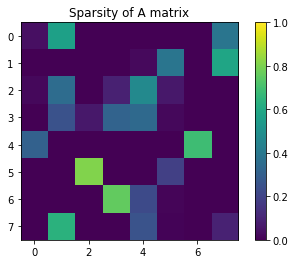

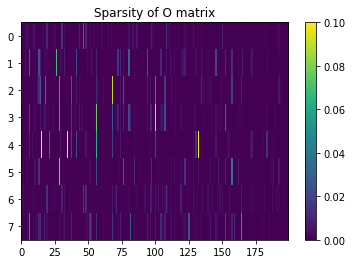

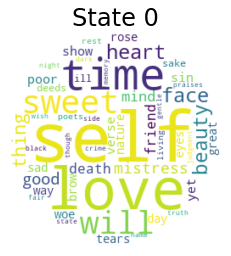

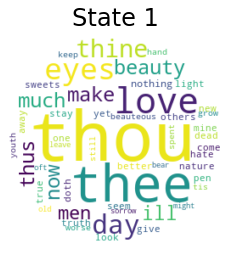

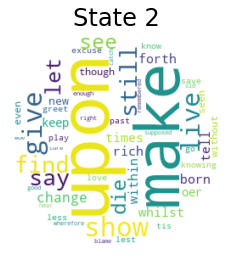

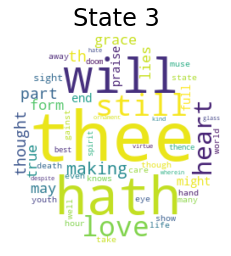

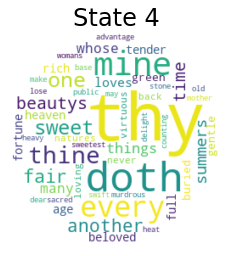

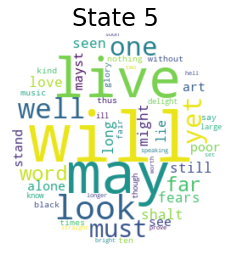

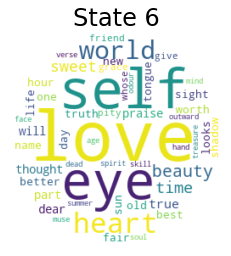

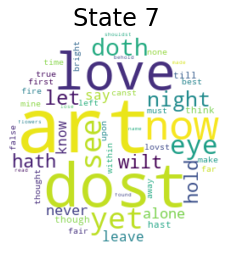


Animating...


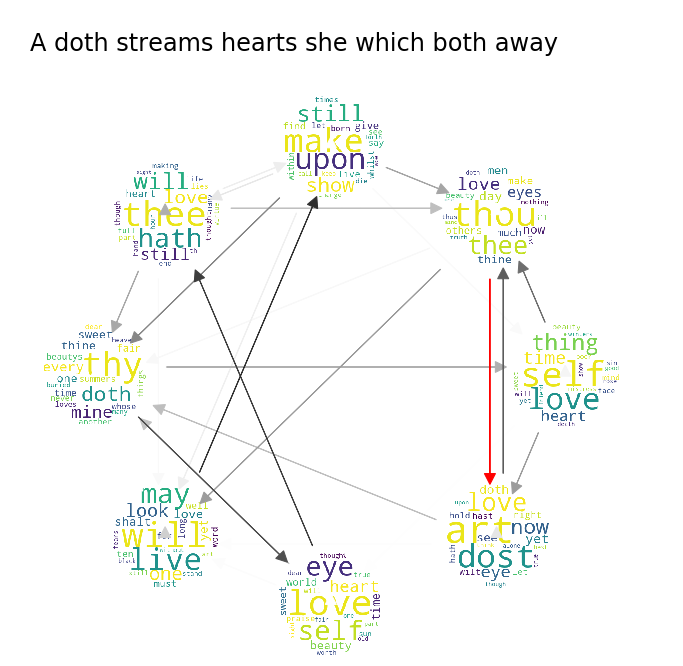

In [13]:
# visualize the sonnet
HMM_helper.visualize_sparsities(hmm8, O_max_cols=200)
wordclouds = HMM_helper.states_to_wordclouds(hmm8, obs_map)
anim = HMM_helper.animate_emission(hmm8, obs_map, M=8)
HTML(anim.to_html5_video())